## Informasi Mahasiswa

Nama: Muhammad Kemal Fasya

NPM : 2108107010052

## Jenis Dataset

Dataset dari kaggle https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data


informasi variabel

* id: ID
* battery_power: Total energy a battery can store in one time measured in mAh
* blue: Has bluetooth or not
* clock_speed: speed at which microprocessor executes instructions
* dual_sim: Has dual sim support or not
* fc: Front Camera mega pixels
* four_g: Has 4G or not
* int_memory: Internal Memory in Gigabytes
* m_dep: Mobile Depth in cm
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory in Megabytes
* sc_h: Screen Height of mobile in cm
* sc_w: Screen Width of mobile in cm
* talk_time: longest time that a single battery charge will last when you are
* three_g: Has 3G or not
* touch_screen: Has touch screen or not
* wifi: Has wifi or not


## Import libraries 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [74]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 17 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (18, 12) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8

## Import Dataset

In [75]:
data = pd.read_csv('dataset/klasifikasi/train.csv')
data
#test_data = pd.read_csv("test.csv")

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Preprocessing

In [76]:
data.describe(include='all')

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Checking the missing values

In [78]:
pd.DataFrame(data.isnull().sum(), columns= ['Number of missing values']) #Any missing values.

,Number of missing values
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


#### There is no missing value in the dataset✔

## EDA

In [79]:
#Finding number of unique values of each column
pd.DataFrame(data.nunique().sort_values(), columns= ['Number of unique values'])

,Number of unique values
blue,2
touch_screen,2
dual_sim,2
four_g,2
three_g,2
wifi,2
price_range,4
n_cores,8
m_dep,10
sc_h,15


## Correlation of Attirubtues

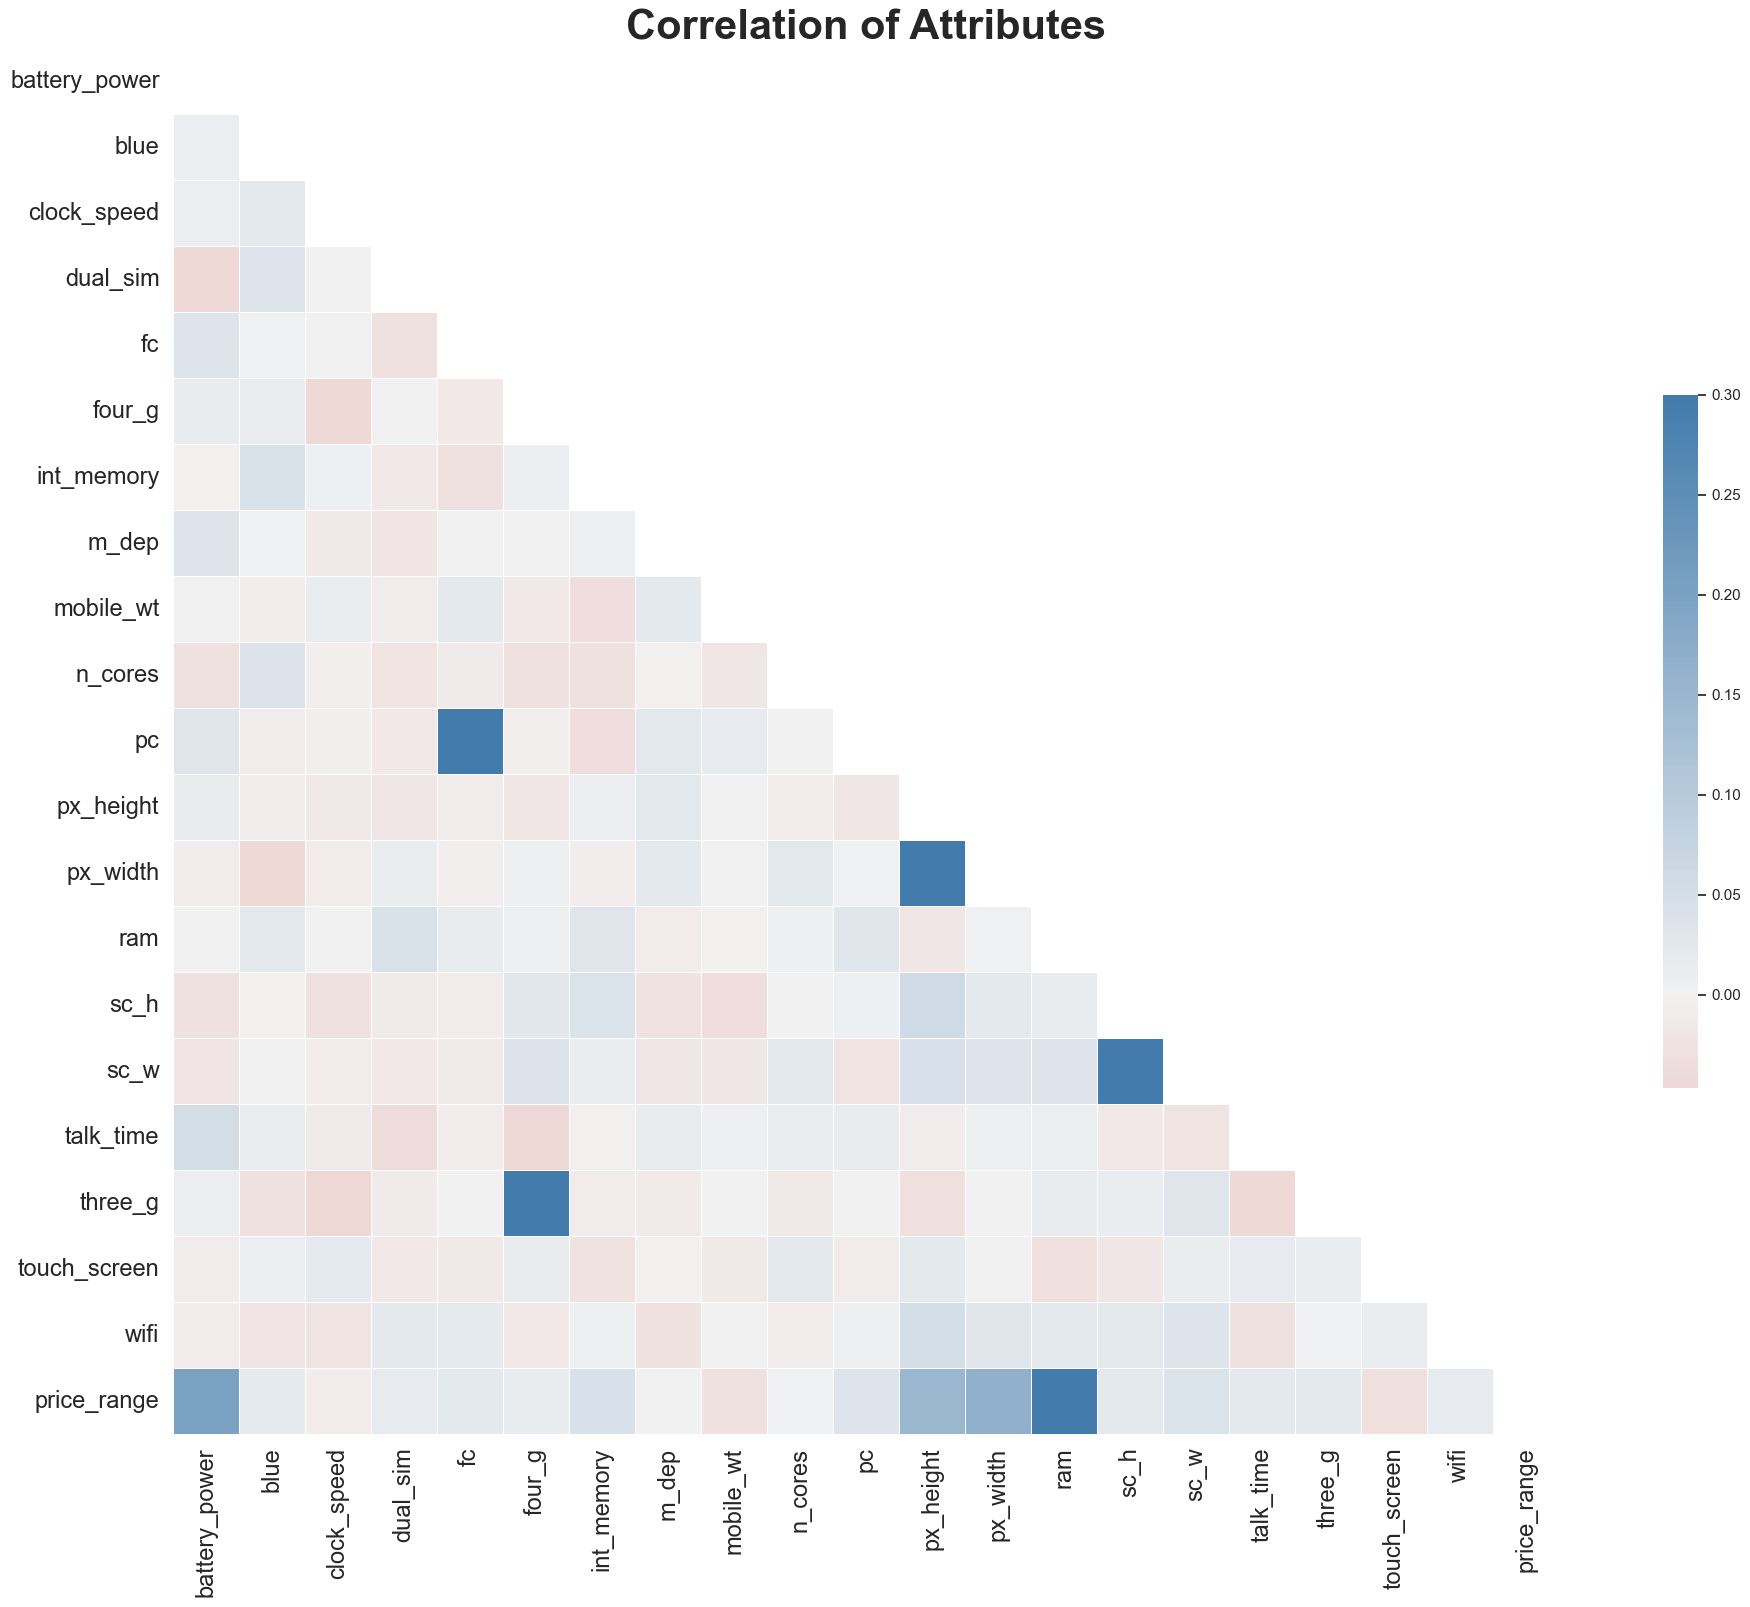

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)  # Change np.bool to bool
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(27,18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(15, 963, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation of Attributes", fontsize=30, fontweight='bold')
ax.xaxis.set_tick_params(labelsize=17)
ax.yaxis.set_tick_params(labelsize=17)
plt.show()


### have high correlation with each other
* pc and fc
* three_g and four_g
* px_width and px_height 

## Correlation between Attributes and Price Range

Text(0.5, 1.0, 'Correlation between Attributes and Price Range')

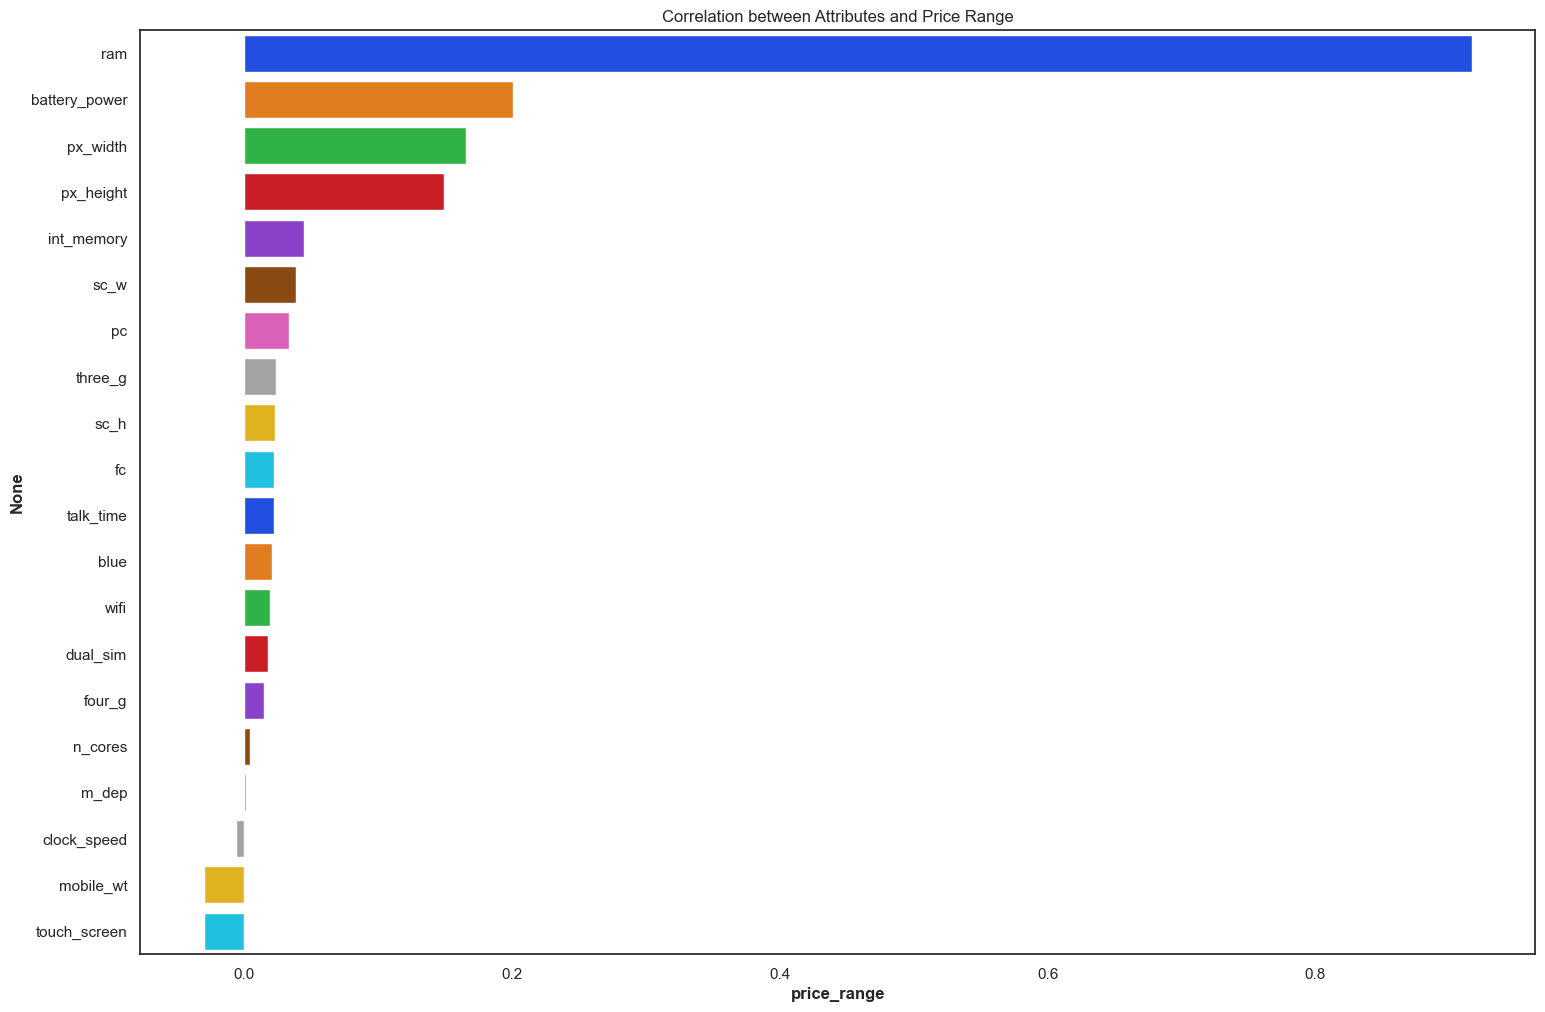

In [81]:
corr = data.corr()
corr = corr.price_range
cr = corr.sort_values(ascending = False)[1:]
sns.barplot(x=cr, y=cr.index,palette = "bright")
plt.title("Correlation between Attributes and Price Range")

In [82]:
import matplotlib.ticker as mtick

## Battery power

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

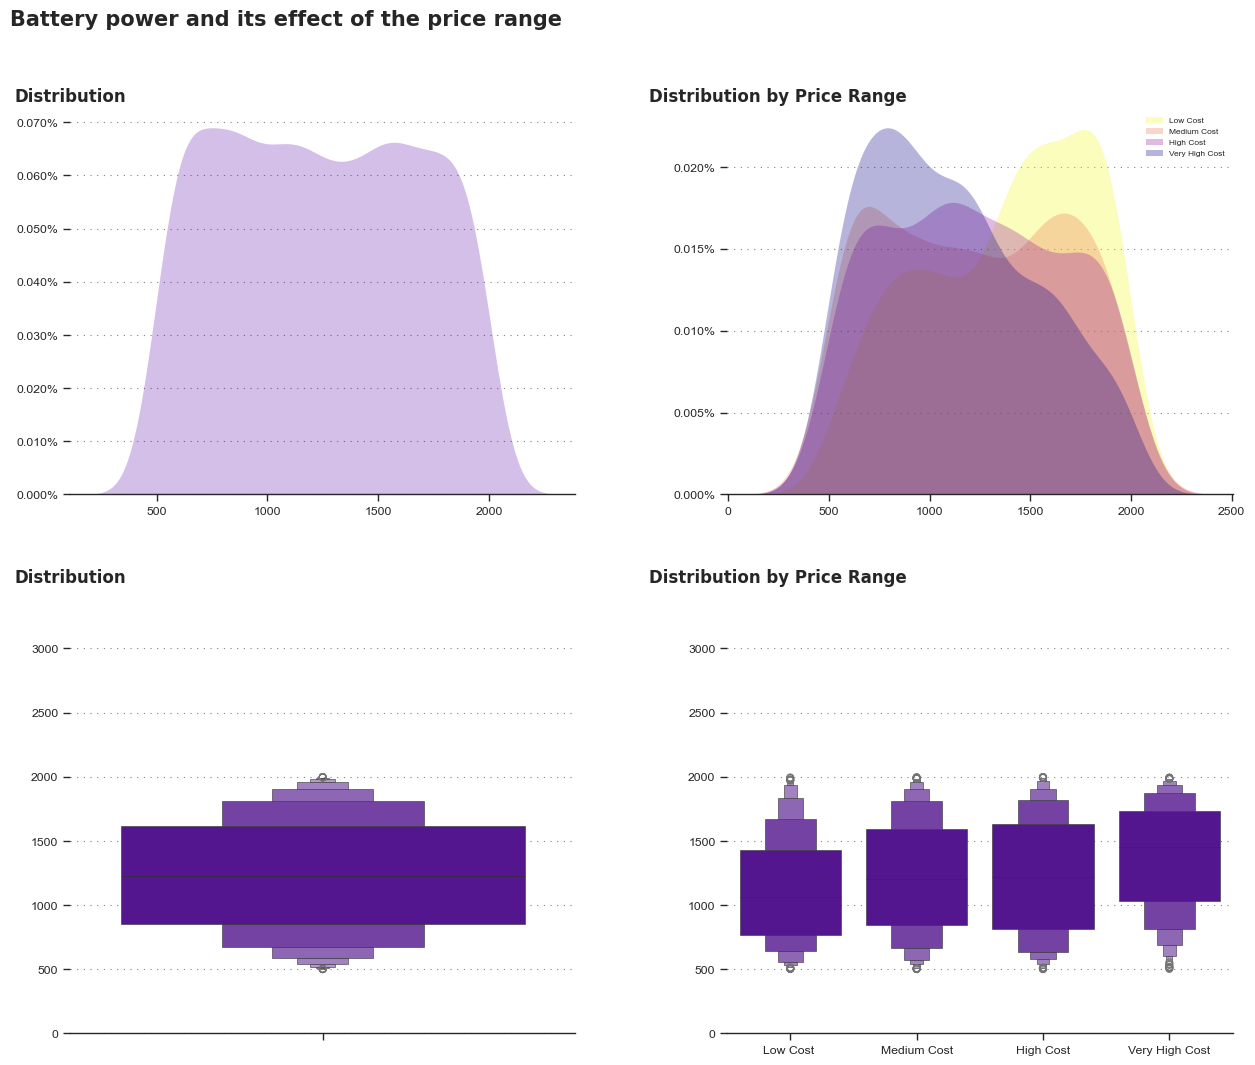

In [83]:
sns.set(rc={"figure.dpi":100})
sns.set_context('paper')
sns.set_style("ticks")

fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Battery power and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0, 3000),xlim=(0,5))
ax3 = fig.add_subplot(gs[1,1],ylim=(0, 3000))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='battery_power',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='battery_power',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y', dashes=(1,5))
sns.boxenplot(x='price_range',
              y='battery_power',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## Internal Memory (Gigabyte)

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

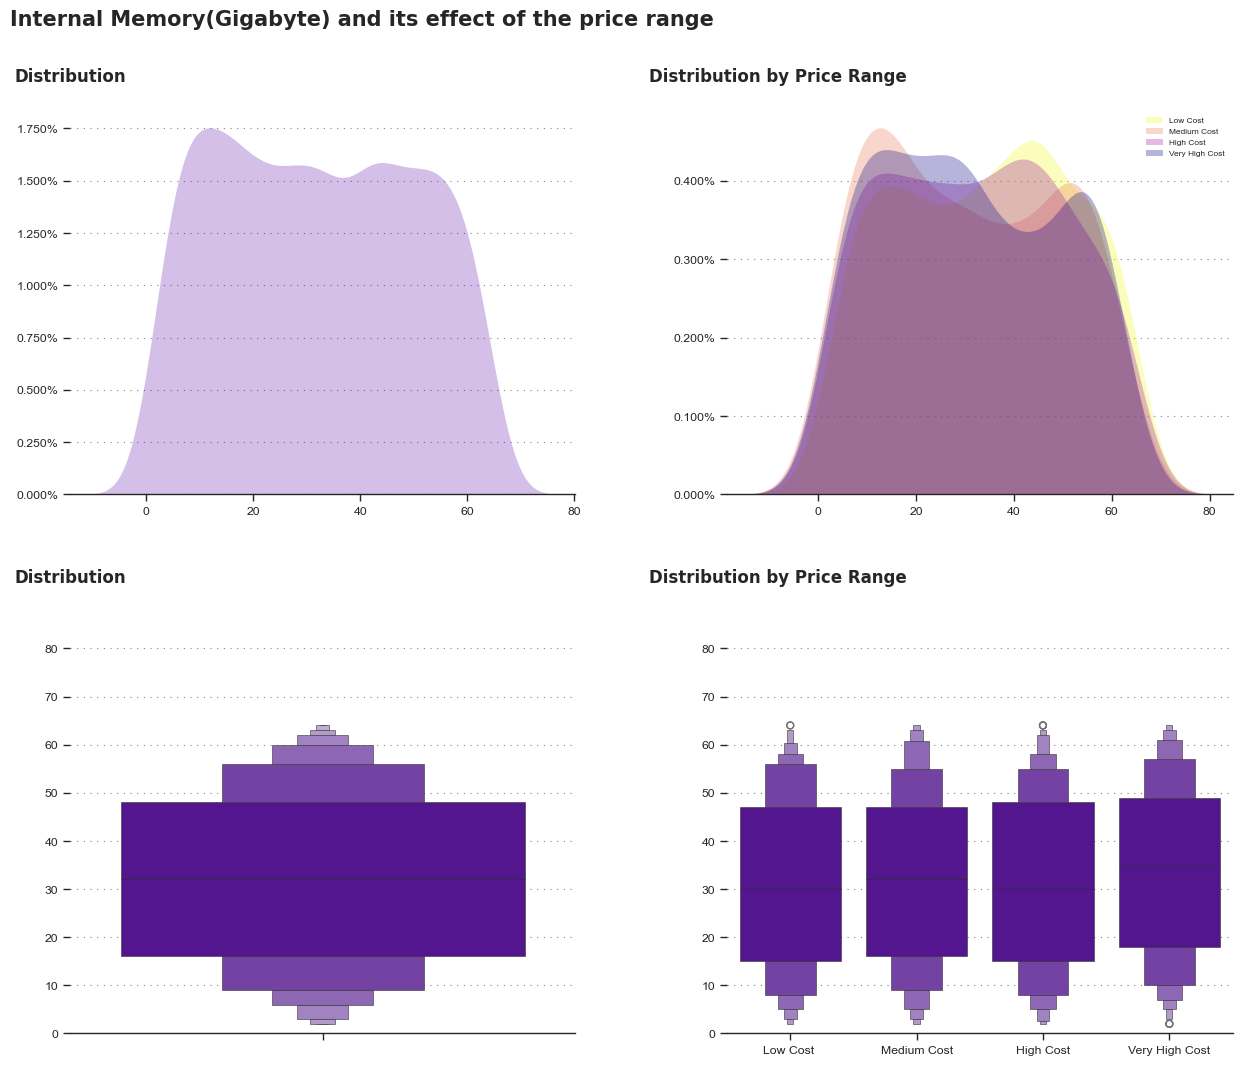

In [86]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Internal Memory(Gigabyte) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0],ylim=(0,80))
ax3 = fig.add_subplot(gs[1,1],ylim=(0,80))

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='int_memory',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='int_memory',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='int_memory',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## Random Access Memory (RAM)

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

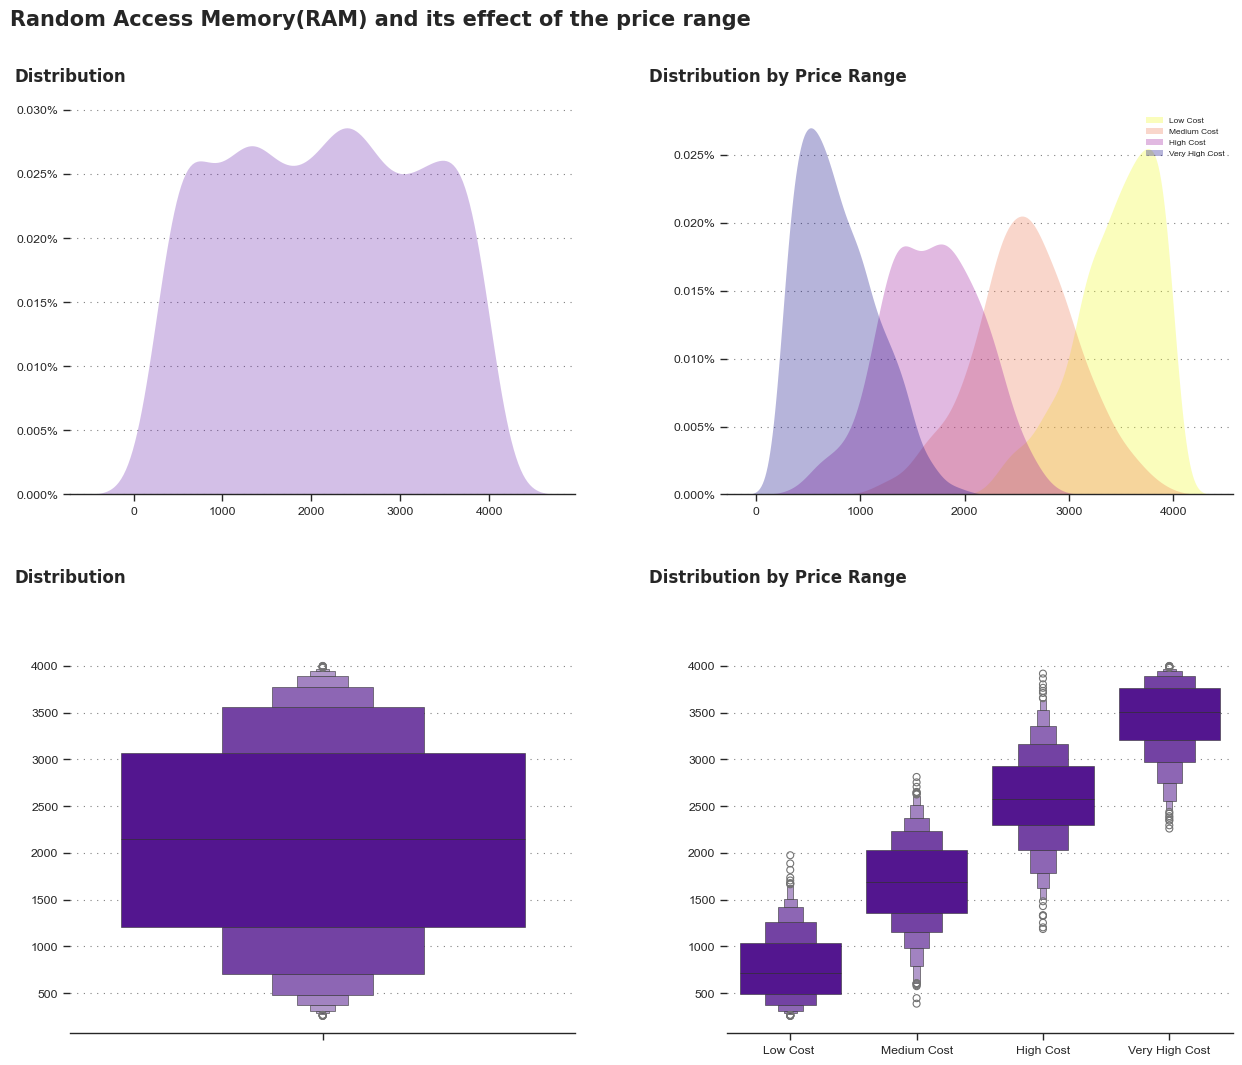

In [93]:
fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
gs.update(wspace=0.3, hspace=0.4)
fig.text(0.085,0.95,'Random Access Memory(RAM) and its effect of the price range ', fontfamily='serif',fontsize=15, fontweight='bold')
sns.set_palette('plasma')

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

#Axis 0 

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
            data=data,
            shade=True,
            ax=ax0,
            linewidth = 0
            )
ax0.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.05)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)


#Axis 1 

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(x='ram',
           hue='price_range',
           shade=True,
           data=data,
           palette='plasma',
           ax=ax1,
           fill=True,
           alpha=.3, 
           linewidth=0
           
           )
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1, decimals=3))
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.05)
ax1.legend(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'],fontsize=6,frameon=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

#Axis 2

ax2.grid(color='gray', linestyle=':', axis='y',  dashes=(1,5))
sns.boxenplot(y='ram',
              data=data,
              ax=ax2,
              linewidth=0.4)

ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0,y=1.15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

#Axis3

ax3.grid(color='gray', linestyle='-', axis='y',  dashes=(1,5))
sns.boxenplot(x='price_range',
              y='ram',
              data=data,
              ax=ax3,
              linewidth=0.4
           
            )

ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1.15)
ax3.set_xticklabels(['Low Cost ', 'Medium Cost','High Cost','Very High Cost'])
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

fig.show()

## Bluetooth

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

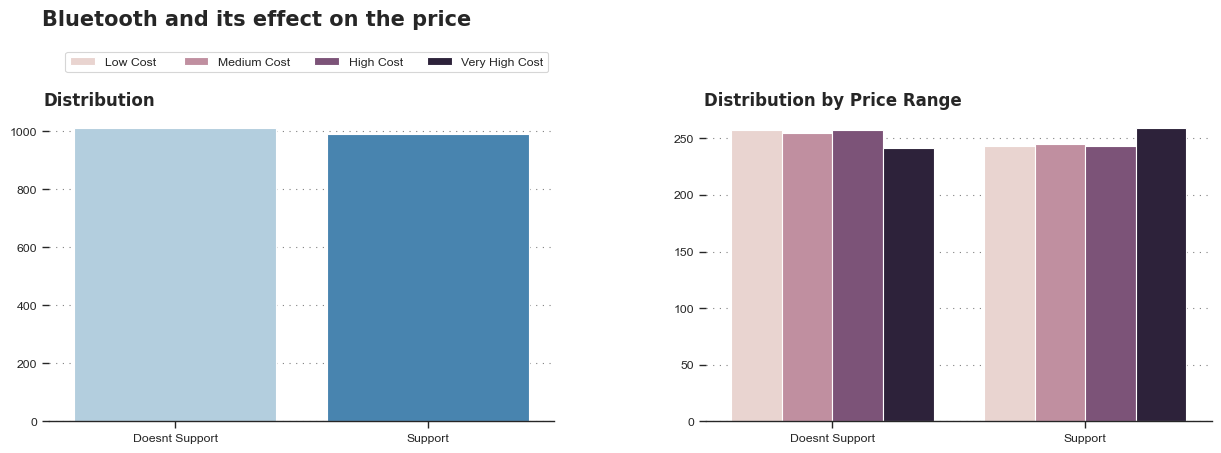

In [97]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Bluetooth and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='blue',
           data=data,
            palette='Blues',
           ax=ax0)

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='blue',
             data=data,
             hue='price_range',
             ax=ax1)

ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## Dual-SIM

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

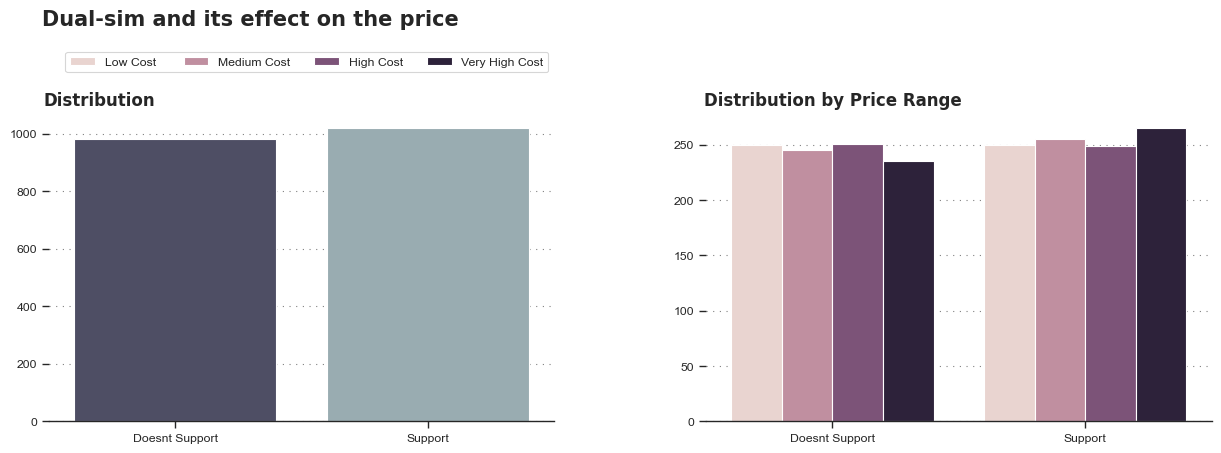

In [98]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Dual-sim and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='dual_sim',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='dual_sim',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## 4G

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

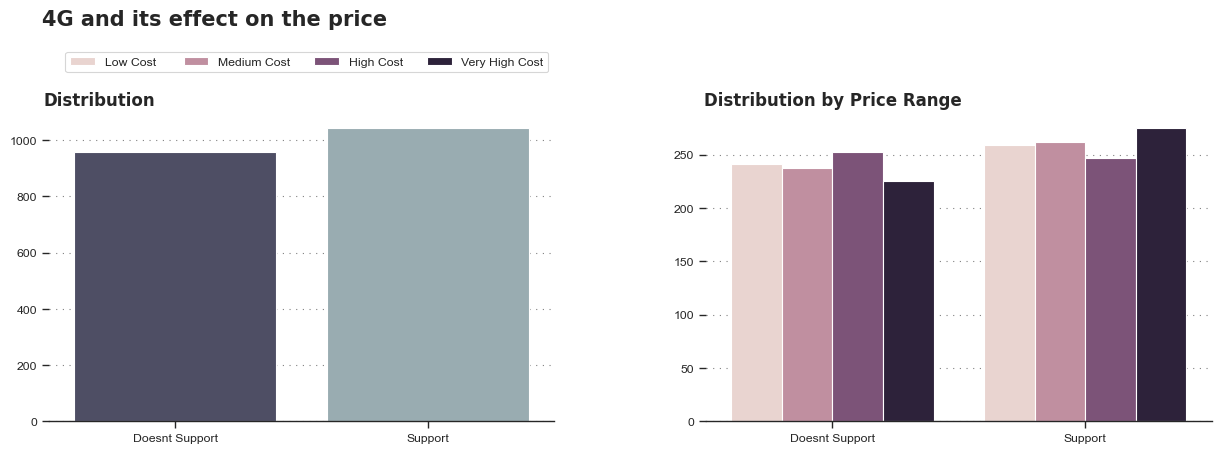

In [99]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'4G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='four_g',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='four_g',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## 3G

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

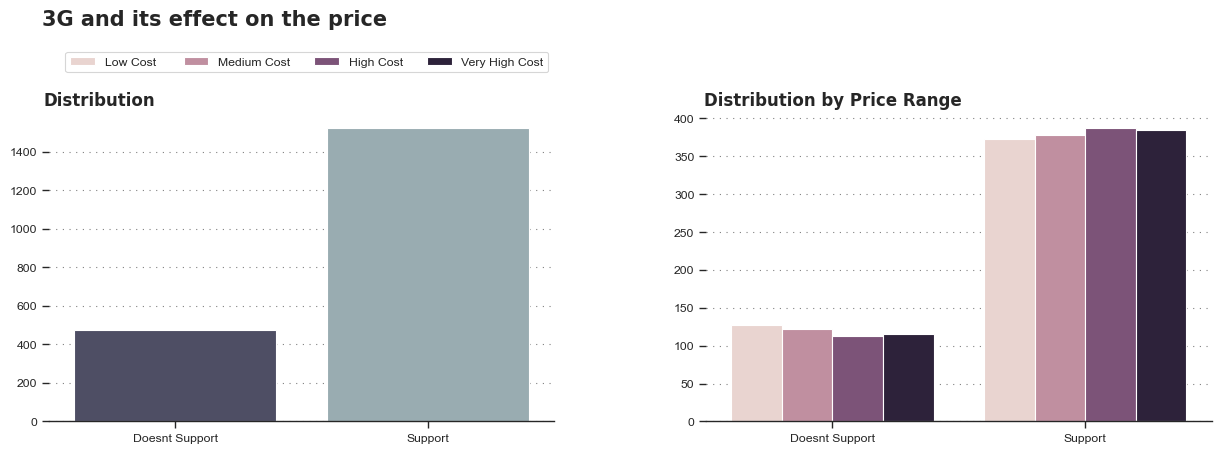

In [100]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'3G and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='three_g',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='three_g',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## Touch Screen

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

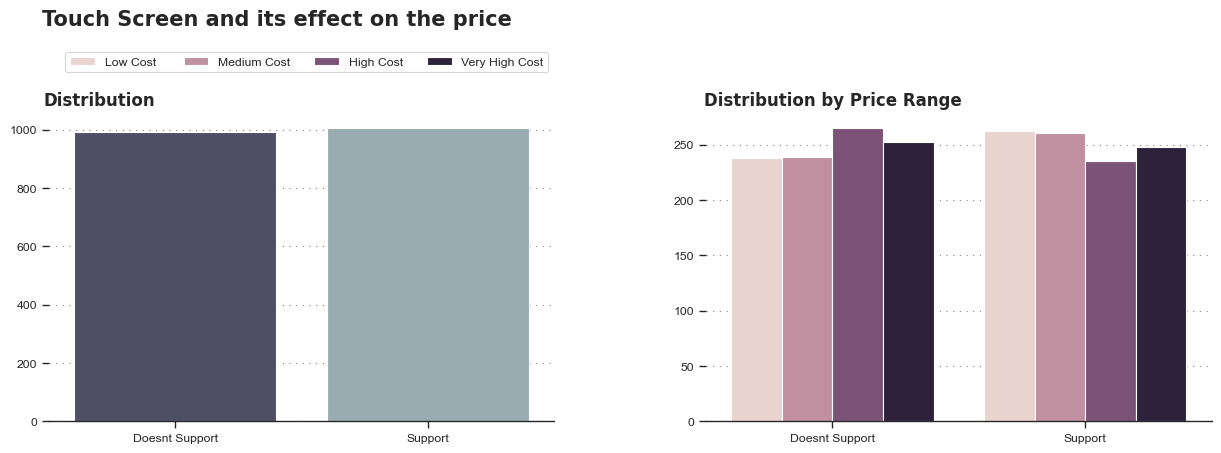

In [101]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Touch Screen and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='touch_screen',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='touch_screen',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

## Wi-Fi

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

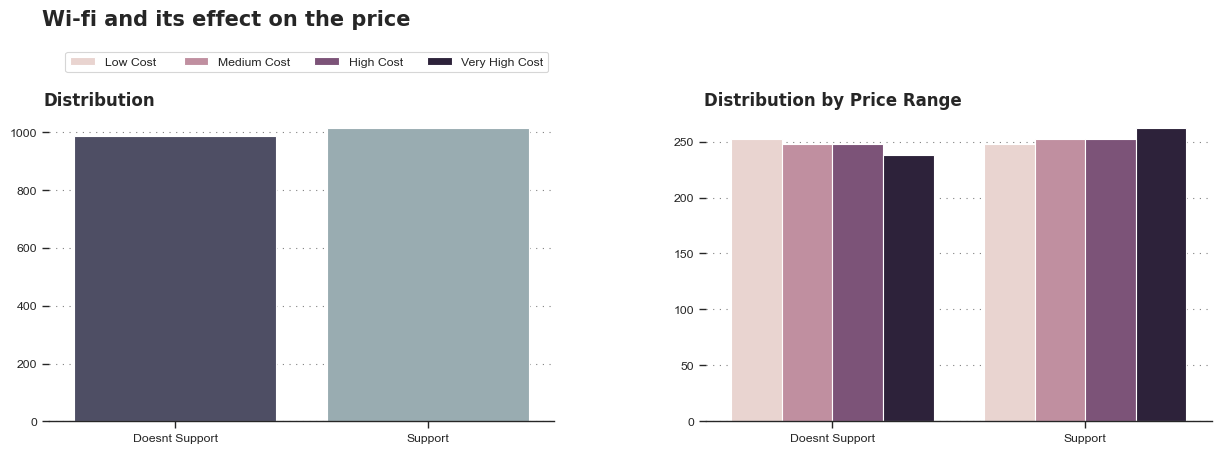

In [102]:
fig = plt.figure(figsize=(15,4))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.3, hspace=0)
fig.text(0.120,1.1,'Wi-fi and its effect on the price ', fontfamily='serif',fontsize=15, fontweight='bold')
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


sns.countplot(x='wifi',
           data=data,
            palette='bone',
           ax=ax0)
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.set_title('Distribution',fontsize=12,fontfamily='serif',fontweight='bold',x=0.1,y=1)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.set_xticklabels(["Doesnt Support","Support"])
ax0.set_xlabel("")
ax0.set_ylabel("")   

sns.countplot(x='wifi',
             data=data,
             hue='price_range',
             ax=ax1)
ax1.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax1.set_title('Distribution by Price Range',fontsize=12,fontfamily='serif',fontweight='bold',x=0.25,y=1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.get_legend().remove()
legend_labels, _= ax1.get_legend_handles_labels()
ax1.legend(legend_labels, ['Low Cost ', 'Medium Cost','High Cost','Very High Cost'], ncol=4, bbox_to_anchor=(-0.30, 1.22))
ax1.set_xticklabels(["Doesnt Support","Support"])
ax1.set_xlabel("")
ax1.set_ylabel("")

fig.show()

In [103]:
CatCols= ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']

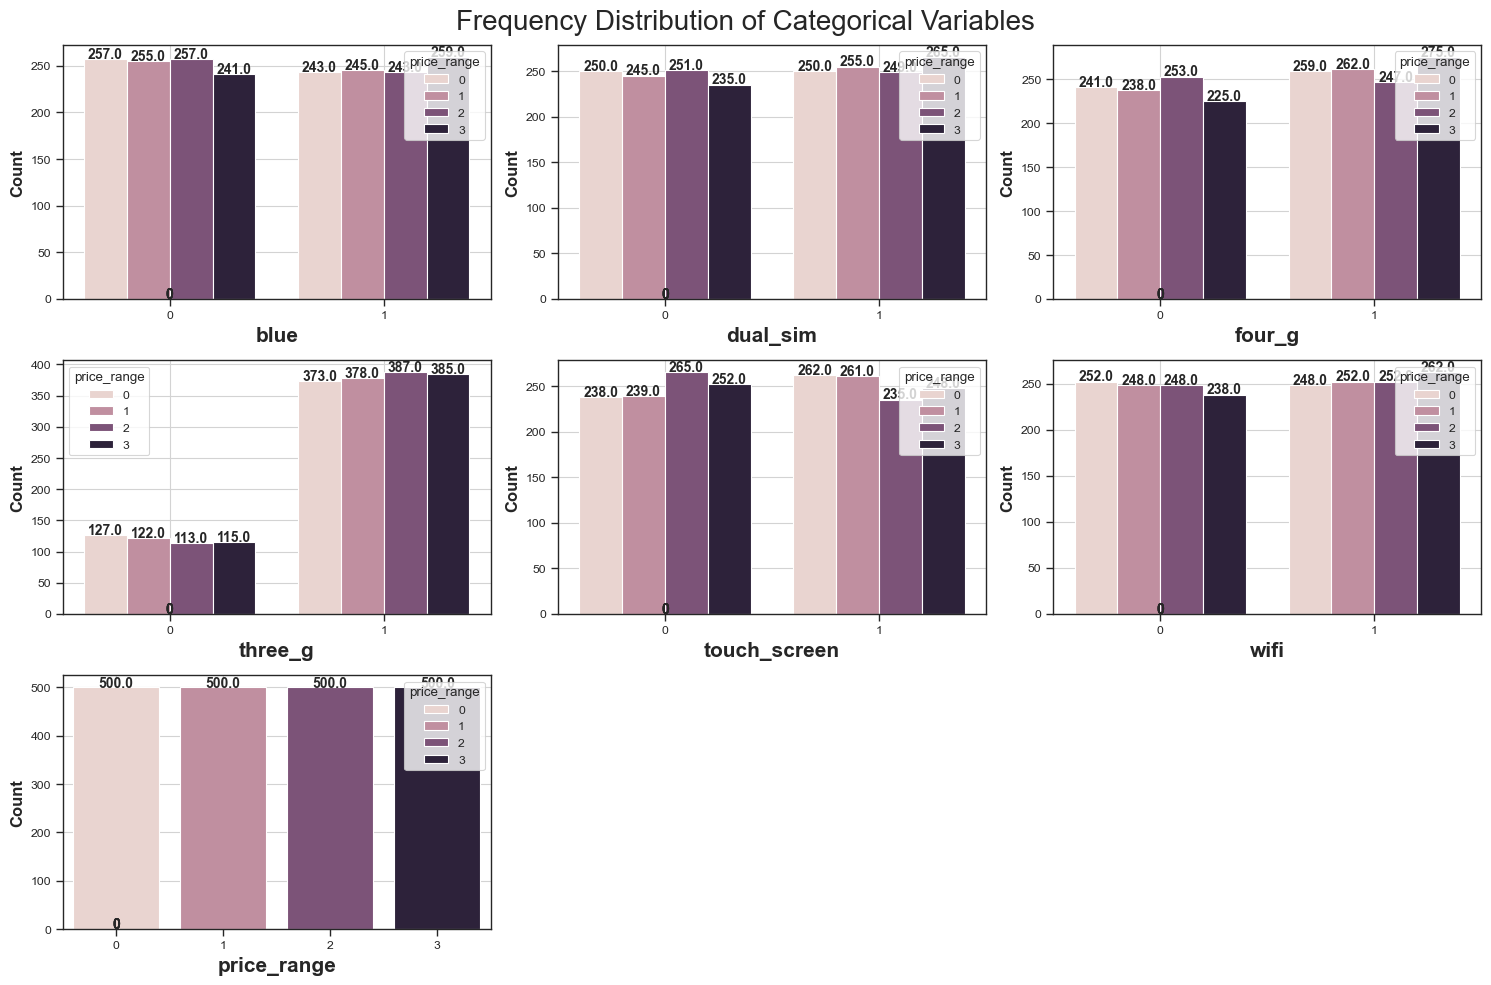

In [104]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

for i in range(len(CatCols)):
    row = i//3
    col = i%3               
    graph = sns.countplot(x=CatCols[i],hue=data['price_range'],data=data, ax=ax[row,col])
    ax[row,col].set_xlabel(CatCols[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticklabels(ax[row,col].get_xticks())
    ax[row,col].grid(color='lightgrey')      
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")

plt.suptitle('Frequency Distribution of Categorical Variables', fontsize=20) 
ax[-1,2].axis('off')
ax[-1,1].axis('off')
plt.tight_layout()
plt.show()

### drop some rows and a column

In [105]:
data['m_dep'].value_counts()

m_dep
0.1    320
0.2    213
0.8    208
0.5    205
0.7    200
0.3    199
0.9    195
0.6    186
0.4    168
1.0    106
Name: count, dtype: int64

* Here we know mobile depth can't be less than 0.6 cm, So we this column

In [106]:
data.drop('m_dep',axis=1,inplace=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


In [107]:
data.loc[data['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1481,1834,0,2.1,0,7,1,40,99,4,11,0,1987,3692,13,0,16,1,1,0,3
1933,897,1,2.0,0,3,1,2,154,8,10,0,994,1958,7,5,7,1,1,0,1


* Pixel Resolution Height can't be 0 !!!
### So drop this two rows

In [108]:
data.drop(index=[1481,1933],inplace=True)
data.reset_index(inplace=True)

In [109]:
data.drop('index',axis=1,inplace=True)

In [110]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1994,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1995,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1996,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


## Creat Final dataframe

In [111]:
#data.drop(['mobile_wt','px_width','sc_h'],axis=1,inplace=True)
Final_df = pd.DataFrame(data)
Final_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1994,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1995,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1996,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1,0


In [112]:
X = Final_df.drop('price_range',axis=1)
y = Final_df['price_range']

## SVM

In [129]:
from sklearn.svm import SVC 

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [131]:
SVM = SVC()

SVM.fit(X_train,y_train)

y_pred = SVM.predict(X_test)
y_pred_train = SVM.predict(X_train)

In [132]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.96


In [133]:
print("Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Accuracy: 0.9456366237482118


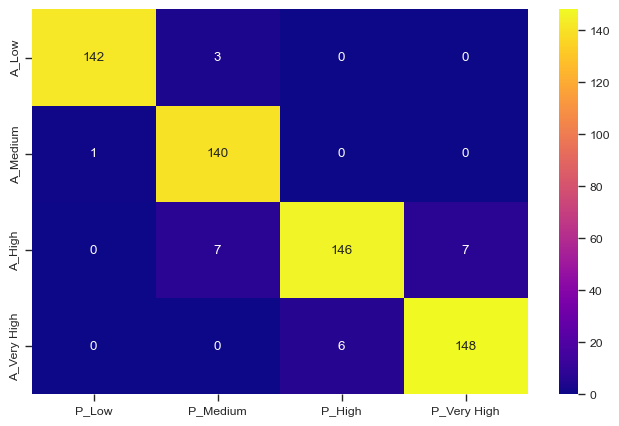

In [134]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="plasma")
plt.show()

In [135]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       145
           1       0.93      0.99      0.96       141
           2       0.96      0.91      0.94       160
           3       0.95      0.96      0.96       154

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [136]:
result = classification_report(y_train, y_pred_train)
print(result)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       355
           1       0.93      0.94      0.93       358
           2       0.95      0.88      0.91       340
           3       0.94      0.98      0.96       345

    accuracy                           0.95      1398
   macro avg       0.95      0.95      0.94      1398
weighted avg       0.95      0.95      0.95      1398



## Improving SVM Model

In [137]:
svm1 = SVC(C=0.2,decision_function_shape='ovo',gamma='auto',kernel='linear',random_state=1)
svm1.fit(X_train,y_train)
y_pred = svm1.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.98


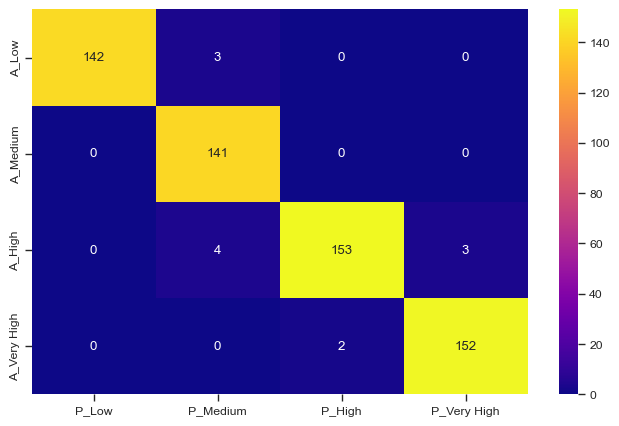

In [138]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix=pd.DataFrame(data=cm,columns=['P_Low','P_Medium','P_High','P_Very High'],index=['A_Low','A_Medium','A_High','A_Very High'])

# set size of the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="plasma")
plt.show()

In [139]:
result = classification_report(y_test, y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       145
           1       0.95      1.00      0.98       141
           2       0.99      0.96      0.97       160
           3       0.98      0.99      0.98       154

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



### Accuracy for train

In [140]:
y_pred_train = svm1.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_train,y_pred_train))

Accuracy: 0.9921316165951359


In [141]:
result = classification_report(y_train, y_pred_train)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       0.99      0.99      0.99       358
           2       0.98      0.99      0.98       340
           3       1.00      0.99      0.99       345

    accuracy                           0.99      1398
   macro avg       0.99      0.99      0.99      1398
weighted avg       0.99      0.99      0.99      1398



### We got a high accuracy 99% result from SVM Model
## So let's doing to test_samples prediction 

In [142]:
data_test = pd.read_csv('dataset/klasifikasi/test.csv')
data_test = pd.DataFrame(data_test)
data_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


## a quick and general look at the data_test

In [143]:
data_test.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,500.5000,288.819436,1.0,250.75,500.5,750.25,1000.0
battery_power,1000.0,1248.5100,432.458227,500.0,895.00,1246.5,1629.25,1999.0
blue,1000.0,0.5160,0.499994,0.0,0.00,1.0,1.00,1.0
clock_speed,1000.0,1.5409,0.829268,0.5,0.70,1.5,2.30,3.0
dual_sim,1000.0,0.5170,0.499961,0.0,0.00,1.0,1.00,1.0
fc,1000.0,4.5930,4.463325,0.0,1.00,3.0,7.00,19.0
four_g,1000.0,0.4870,0.500081,0.0,0.00,0.0,1.00,1.0
int_memory,1000.0,33.6520,18.128694,2.0,18.00,34.5,49.00,64.0
m_dep,1000.0,0.5175,0.280861,0.1,0.30,0.5,0.80,1.0
mobile_wt,1000.0,139.5110,34.851550,80.0,109.75,139.0,170.00,200.0


In [144]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [145]:
## Here drop the "id " and "'m_dep"

In [146]:
data_test.drop(['id','m_dep'],axis=1,inplace=True)
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0


* checked ['px_height']==0

In [147]:
data_test.loc[data_test['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
420,986,0,2.8,0,0,1,26,80,8,9,0,1214,1316,7,5,8,1,0,0
819,1992,1,1.3,1,8,1,43,153,5,15,0,883,2179,7,6,20,1,1,0


In [148]:
data_test.drop(index=[420,819],inplace=True)
data_test.reset_index(inplace=True)

In [149]:
data_test.drop('index',axis=1,inplace=True)

In [150]:
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0
994,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1
995,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0
996,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0


## Now our data_test is ready for predict the price_range ✔ 

In [151]:
data_test['price_range'] = svm1.predict(data_test)
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1700,1,1.9,0,0,1,54,170,7,17,644,913,2121,14,8,15,1,1,0,2
994,609,0,1.8,1,0,0,13,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
995,1185,0,1.4,0,1,1,8,80,1,12,477,825,1223,5,0,14,1,0,0,0
996,1533,1,0.5,1,0,0,50,171,2,12,38,832,2509,15,11,6,0,1,0,2


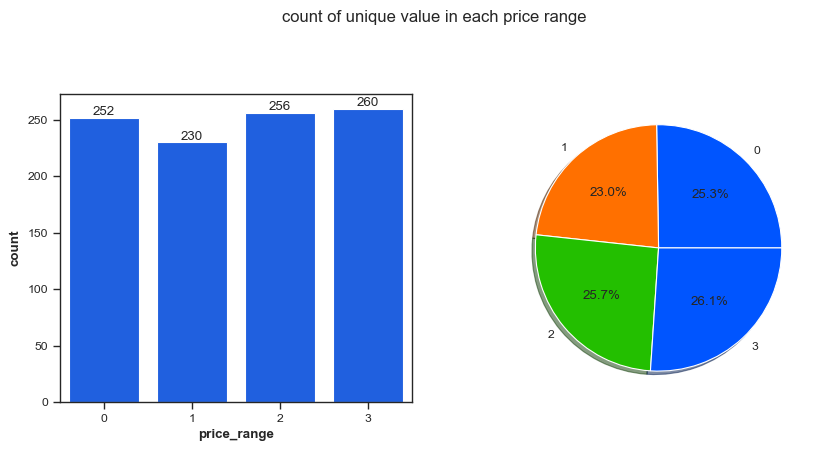

In [152]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

sns.countplot(data=data_test,x='price_range',ax=axes[0])

for container in axes[0].containers:
    axes[0].bar_label(container)
    
slices = data_test['price_range'].value_counts().sort_index().values
activities = [var for var in data_test['price_range'].value_counts().sort_index().index]
axes[1].pie(slices,labels=activities,shadow=True, autopct='%1.1f%%')

plt.suptitle(f'count of unique value in each price range',y=1.09)
plt.show()

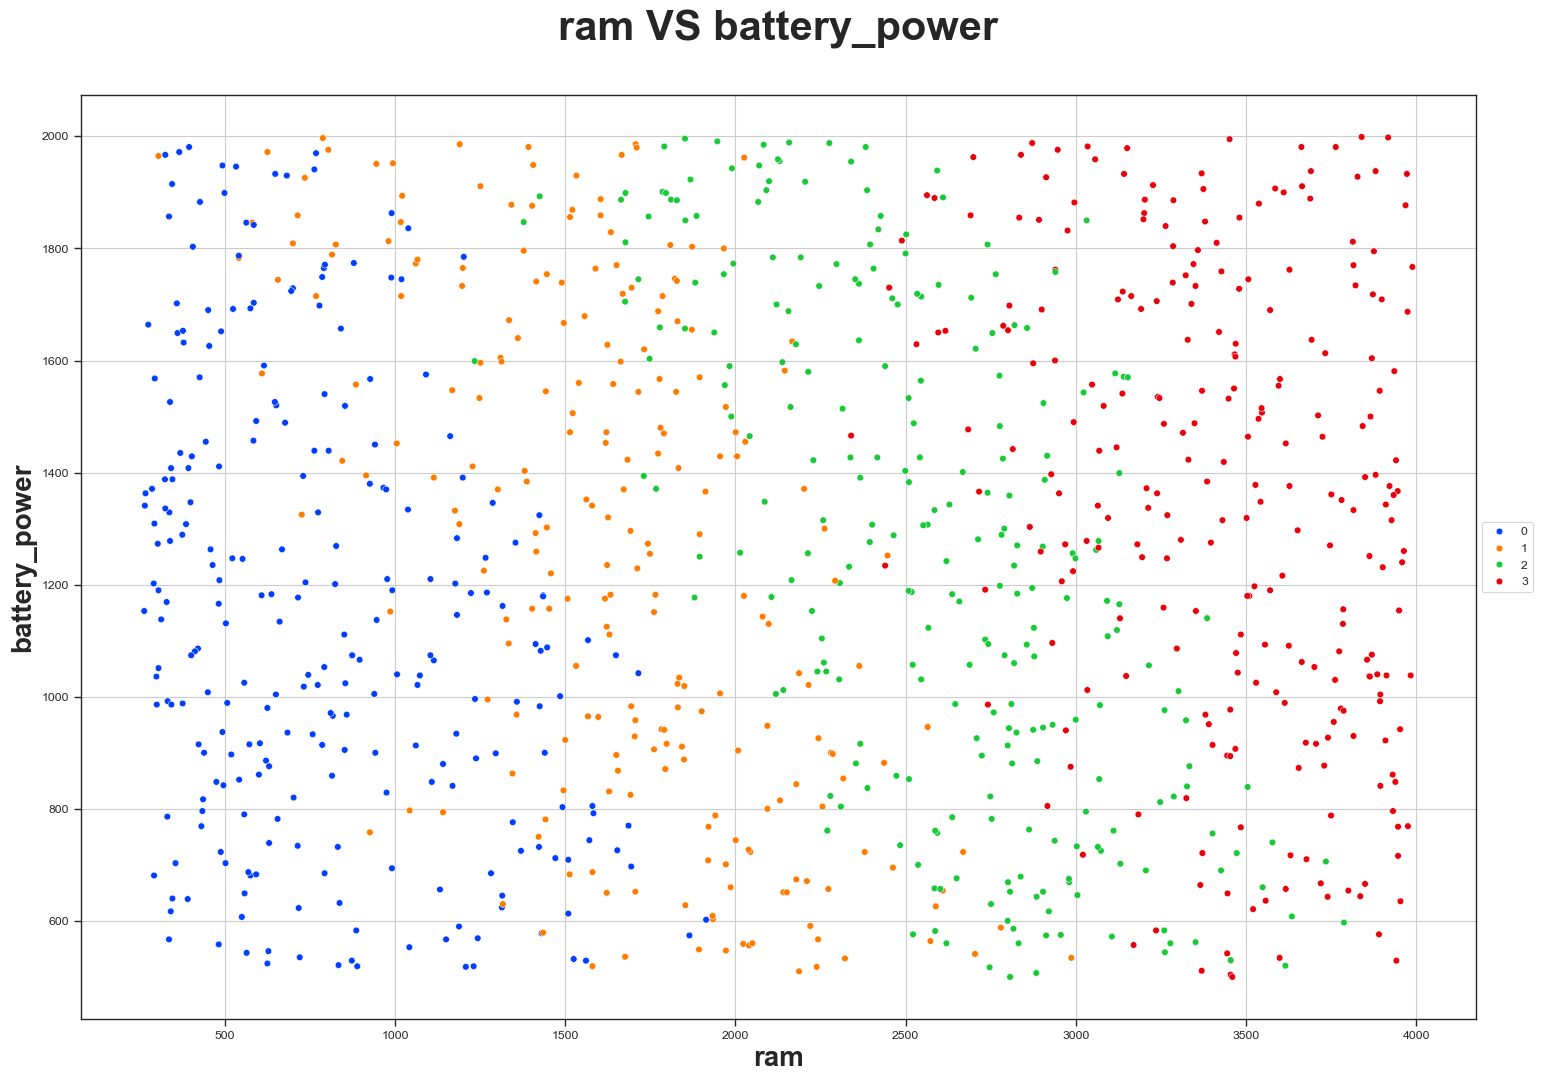

In [153]:
sns.set_palette('bright')
sns.scatterplot(data=data_test,x='ram',y='battery_power',hue='price_range',palette='bright')
plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
plt.title("ram VS battery_power",fontsize=30,fontweight='bold',y=1.05)
plt.xlabel("ram",fontsize=20,fontweight='bold')
plt.ylabel('battery_power',fontsize=20,fontweight='bold')
plt.grid()
plt.show()